# Conv Layer

In [44]:
import torch
import torch.nn as nn

x = torch.tensor([[
    [1,2,3,0,0],
    [4,5,6,0,0],
    [7,8,9,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
    ]], dtype=torch.float32)

conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, bias=False)

if True:
    with torch.no_grad():
        conv.weight[0] = torch.tensor( [[
            [
            [-1,-1,-1],
            [0,0,0],
            [1,1,1]
            ]
        ]])

        conv.weight[1] = torch.tensor( [[
            [
            [-1,0,1],
            [-1,0,1],
            [-1,0,1]
            ]
        ]])
        

    y = conv(x)

In [45]:
y.shape

torch.Size([2, 3, 3])

In [46]:
y

tensor([[[ 18.,  12.,   6.],
         [-15., -11.,  -6.],
         [-24., -17.,  -9.]],

        [[  6., -15., -18.],
         [  4., -13., -15.],
         [  2.,  -8.,  -9.]]], grad_fn=<SqueezeBackward1>)

In [42]:
conv.weight

Parameter containing:
tensor([[[[-0.0047,  0.2784,  0.0394],
          [-0.2909,  0.0386,  0.2420],
          [-0.2159, -0.1959,  0.2398]]],


        [[[-0.0761,  0.1612,  0.2498],
          [ 0.1928,  0.0466, -0.2126],
          [-0.0360, -0.2827, -0.0151]]]], requires_grad=True)

In [43]:
conv.weight.shape

torch.Size([2, 1, 3, 3])

In [36]:
x[0,0:3,0:3].flatten()

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [37]:
conv.weight[0].flatten()

tensor([-1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.], grad_fn=<ViewBackward0>)

In [38]:
torch.dot(x[0,0:3,0:3].flatten(), conv.weight[0].flatten())

tensor(18., grad_fn=<DotBackward0>)

Eingabeform: torch.Size([1, 1, 128, 128])


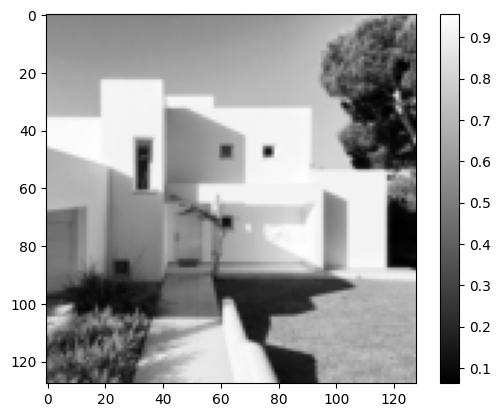

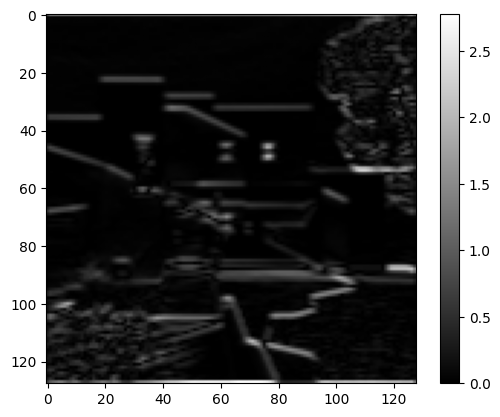

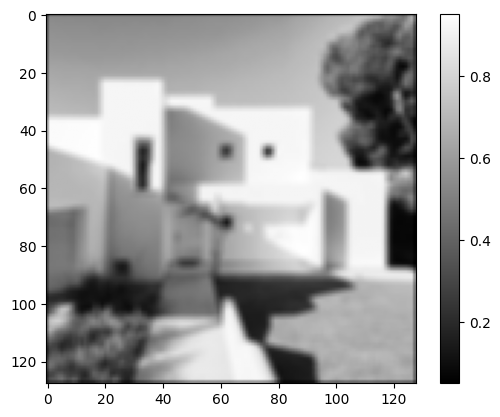

In [25]:
import torch
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1️⃣ Bild laden (Graustufen)
fname = "/home/juebrauer/link_to_vcd/10_datasets/01_test_images/haus01.jpg"
img = Image.open(fname).convert("L")  # "L" = grayscale
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
x = transform(img).unsqueeze(0)  # (1, 1, H, W)
print("Eingabeform:", x.shape)

# 2️⃣ Conv2d mit 2 Filtern, 1 Eingangskanal
conv = nn.Conv2d(1, 2, kernel_size=3, padding=1, bias=False)

# 3️⃣ Filter per Hand setzen
sobel = torch.tensor([[
    [[-1, -1, -1],
     [ 0,  0,  0],
     [ 1,  1,  1]]
]])

blur = torch.tensor([[
    [[1, 1, 1],
     [1, 1, 1],
     [1, 1, 1]]
]]) / 9.0

conv.weight = nn.Parameter(torch.cat([sobel, blur], dim=0))

# 4️⃣ Anwenden
with torch.no_grad():
    y = conv(x)

# 5️⃣ Anzeigen
plt.imshow(x[0,0].numpy(), cmap="gray")
plt.colorbar()
plt.show()

plt.imshow(abs(y[0,0].detach().numpy()), cmap="gray")
plt.colorbar()
plt.show()

plt.imshow(y[0,1].detach().numpy(), cmap="gray")
plt.colorbar()
plt.show()


In [52]:
type(img)

PIL.Image.Image

In [54]:
x

tensor([[[[0.5255, 0.5294, 0.5255,  ..., 0.5686, 0.6784, 0.6863],
          [0.5373, 0.5373, 0.5373,  ..., 0.6000, 0.7294, 0.7059],
          [0.5451, 0.5451, 0.5451,  ..., 0.6824, 0.6784, 0.6392],
          ...,
          [0.2745, 0.2980, 0.2549,  ..., 0.6824, 0.6314, 0.6314],
          [0.3020, 0.3333, 0.3333,  ..., 0.6549, 0.6392, 0.6549],
          [0.3569, 0.4824, 0.4392,  ..., 0.6471, 0.6667, 0.7059]]]])

In [55]:
import numpy as np
arr = np.array(img)

In [56]:
arr.shape

(3024, 3024)

In [59]:
arr.flatten().min()

np.uint8(0)

In [60]:
arr.flatten().max()

np.uint8(255)

# Pool Layer


In [20]:
import torch
import torch.nn as nn

x = torch.tensor([[
    [1,2,3,0,0],
    [4,5,6,0,0],
    [7,8,9,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
    ]], dtype=torch.float32)

pool = nn.MaxPool2d(kernel_size=2, stride=None)

y = pool(x)

In [21]:
y

tensor([[[5., 6.],
         [8., 9.]]])

In [22]:
y.shape

torch.Size([1, 2, 2])

In [24]:
pool.weight

AttributeError: 'MaxPool2d' object has no attribute 'weight'